# Do not change imports!

In [35]:
import numpy as np
import pandas as pd

import sklearn
from sklearn import preprocessing, decomposition

import matplotlib.pyplot as plt
%matplotlib inline

# A. Import Data

For this assignment we will use the Iris [dataset](http://archive.ics.uci.edu/ml/datasets/Iris).

In [36]:
# Read the data - directly from the web!
#                 column names are separate, so we add them manually
data = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None,
    names = ['sepal_l_cm', 'sepal_w_cm', 'petal_l_cm', 'petal_w_cm', 'species'],
    sep=',')

# Output the data (notice Pandas will split long files)
data

,sepal_l_cm,sepal_w_cm,petal_l_cm,petal_w_cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [37]:
# So as to not fool ourselves, let's split on input data/class label
# In an unsupervised setting, we might not have the class label,
# or use it only for final evaluation
X = data.iloc[:,0:-1]
Y = data.iloc[:, -1]
data = None

In [38]:
# Just to confirm...
X

,sepal_l_cm,sepal_w_cm,petal_l_cm,petal_w_cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


# B. Data Exploration via Pandas

In [39]:
# Use the describe method to output a table of basic stats on all of X's columns

X.describe()

,sepal_l_cm,sepal_w_cm,petal_l_cm,petal_w_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F706E49710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F70706C358>]], dtype=object)

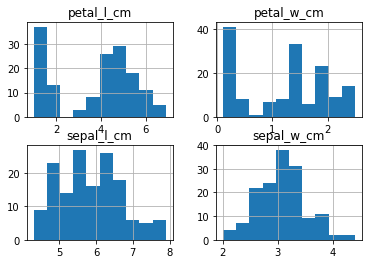

In [41]:
# Use the hist method to output histograms of all of X's columns
X.hist()

## B.1 Supervised Visualization
While not something we can always do, let's plot each feature with its corresponding species

In [42]:
distinct_species = Y.unique()

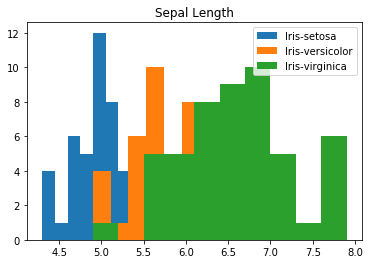

In [43]:
for species in distinct_species:
    plt.hist([X.loc[p].sepal_l_cm for p in Y[Y.isin([species])].index], label=species)

plt.title('Sepal Length')
plt.legend(loc='upper right')

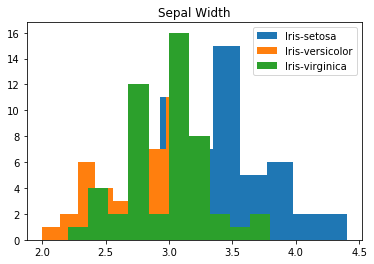

In [44]:
# repeat for sepal width
for species in distinct_species:
    plt.hist([X.loc[p].sepal_w_cm for p in Y[Y.isin([species])].index], label=species)

plt.title('Sepal Width')
plt.legend(loc='upper right')

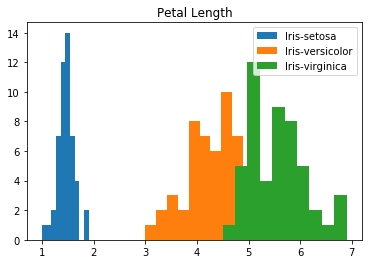

In [45]:
# repeat for petal length
for species in distinct_species:
    plt.hist([X.loc[p].petal_l_cm for p in Y[Y.isin([species])].index], label=species)

plt.title('Petal Length')
plt.legend(loc='upper right')

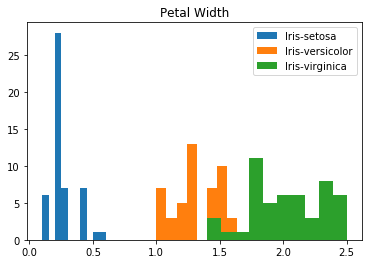

In [46]:
# repeat for petal width
for species in distinct_species:
    plt.hist([X.loc[p].petal_w_cm for p in Y[Y.isin([species])].index], label=species)

plt.title('Petal Width')
plt.legend(loc='upper right')

TODO: given these visualizations, what conclusion can you draw with respect to the potential for dimensionality reduction
Using, petal width and petal length from above, we can see data is visually differentiable. This can be potential for dimensionality reduction.

However, it isnt the same case for sepal, since there is lot of interconnectivity in sepals. The data cannot be differentiated between different species.

# C. Preprocessing with `scikit-learn`
Before we apply PCA, all features should be normalized such that mean=0, std=0

In [12]:
# TODO: Use the fit_transform function of a preprocessing.StandardScaler to normalize X
#       Replace assignment
# X_std = preprocessing.StandardScaler().fit(X[['sepal_l_cm', 'sepal_w_cm', 'petal_l_cm', 'petal_w_cm']])
X_std = preprocessing.StandardScaler().fit_transform(X)

In [13]:
# Get the newly standardized data back into a Pandas DataFrame data structure for convenience
X_std = pd.DataFrame(X_std, columns=list(X))

In [14]:
# TODO: use describe to confirm mean/variance has changed
X_std.describe()

,sepal_l_cm,sepal_w_cm,petal_l_cm,petal_w_cm
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F705B93F28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F705D5AB38>]], dtype=object)

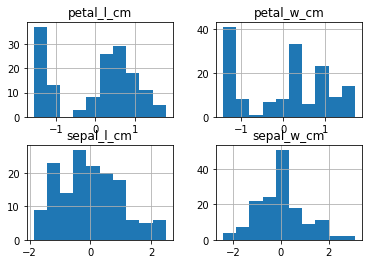

In [15]:
# TODO: use hist to confirm that the columns have the same relative shapes as before preprocessing
X_std.hist()

# D. Computing the Covariance Matrix
In order to perform PCA with the eigendecomposition, we will need the covariance matrix

In [16]:
# TODO: use NumPy's cov function to compute the covariance matrix of X_std
#       NOTE! it expects each row to be all the values of a feature
#             SO... give it the transpose of X_std
X_std1 = np.cov(X_std.T)
X_std1


array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

But of course we will do this by hand :)

$ \Sigma = \frac{1}{n-1} [ (X - \bar{X})^\intercal(X - \bar{X}) ] $

But remember, we've already subtracted the mean (for `X_std`), so...

$ \Sigma = \frac{1}{n-1} ( X^\intercal X ) $

In [17]:
# TODO: get n via the shape attribute
n = X_std.shape
n

(150, 4)

In [18]:
# TODO: a quick way to perform matrix multiplication is the @ operator
#       NOTE! access the data in the DataFrame via the "values" attribute
X_std_cov = (X_std.T.values @ X_std.values)/(n[0]-1)

# check that your covariance = NumPy above
X_std_cov

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

TODO: why is this less than an ideal matrix to compute for real datasets?
Matrix multiplication computation will be really expensive for really big datasets.

# E. Eigendecomposition vs SVD

In [19]:
# TODO: use the eig linear algebra function of NumPy to compute the eigendecomposition
eigvals, eigvecs = np.linalg.eig(X_std_cov)
                          
print("Values:", eigvals)
print()
print("Vectors:", eigvecs)

Values: [ 2.93035378  0.92740362  0.14834223  0.02074601]

Vectors: [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [20]:
# TODO: use the svd linear algebra function of NumPy to compute the SVD
#       Note! as with cov, use the transpose
svd_u,svd_s,svd_v = np.linalg.svd(X_std_cov.T, full_matrices=True)

print("U:", svd_u)
print()
print("S:", svd_s)
print()
print("V:", svd_v)

U: [[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]

S: [ 2.93035378  0.92740362  0.14834223  0.02074601]

V: [[-0.52237162  0.26335492 -0.58125401 -0.56561105]
 [-0.37231836 -0.92555649 -0.02109478 -0.06541577]
 [ 0.72101681 -0.24203288 -0.14089226 -0.6338014 ]
 [ 0.26199559 -0.12413481 -0.80115427  0.52354627]]


TODO:
1. Comment on what components of the eigendecomposition correspond to what components of the SVD
eigvals -> S
eigvecs -> U

The right singular  vectors of conv(X_std_cov.T) are set of orthogonal eigenvectors of conv(X_std.T)

2. For each of these, note that the values are not identical - why is this ok with respect to how we use/interpret the results?

This is okay since the magnitude of all the vectors are same. Only the directions of vectors are different, which is okay.



# F. Selecting Components
To make the decision about which components to keep, we typically keep those that explain the most variance.

NOTE: the eigenvalues/S should be sorted descending before performing these steps (may already be done)

## F.1 Variance via Eigendecomposition
Explained variance is simply each eigenvalue as a proportion of the sum of the eigenvalues

In [21]:
prop_eig = [e/sum(eigvals) for e in eigvals]

print(sum(prop_eig))
print(prop_eig)

1.0
[0.72770452093801363, 0.23030523267680639, 0.036838319576273801, 0.005151926808906364]


## F.2 Variance via SVD
Explained variance is each value in S **squared** divided by the sum of all values **squared**:

$$ \frac{s^2}{\sum_i s_i^2} $$

In [22]:
# TODO: implement for SVD
prop_svd = [s/sum(svd_s) for s in svd_s]

print(sum(prop_svd))
print(prop_svd)

1.0
[0.72770452093801352, 0.23030523267680619, 0.036838319576273898, 0.0051519268089063501]


## F.3 Plot Explained Variance

array([ 0.72770452,  0.95800975,  0.99484807,  1.        ])

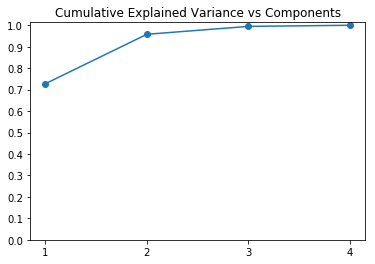

In [23]:
plt.plot([x+1 for x in range(len(prop_eig))], np.cumsum(prop_eig), '-o')

plt.yticks(np.linspace(0, 1, 11, endpoint=True))
plt.xticks(np.linspace(1, len(prop_eig), len(prop_eig), endpoint=True))
plt.title('Cumulative Explained Variance vs Components')

np.cumsum(prop_eig)

In [24]:
# TODO: set the following variable to the number of components needed to explain 90% of the variance
numpcs = 2

## F.4 PCA via `scikit-learn`
Now that we've done this by hand, notice the easy shortcut :)

In [25]:
skl_pca = sklearn.decomposition.PCA(n_components=numpcs).fit(X_std)

print("Components:", skl_pca.components_)
print()
print("S:", skl_pca.singular_values_)
print()
print("Explained Variance: ", skl_pca.explained_variance_ratio_)

Components: [[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]

S: [ 20.89551896  11.75513248]

Explained Variance:  [ 0.72770452  0.23030523]


# G. Visualizing the Projected Data
Now let's project the data into the space defined by our top components (where $W_k$ is the matrix of the $k$ top eigenvectors): $ X_{proj} = X_{std}W_k $

In [26]:
# TODO: extract the first k eigenvectors
W = eigvecs[:,:2]

print("W_{}={}".format(numpcs, W))


W_2=[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [27]:
# Dimensions
print(X_std.shape)
print(W.shape)

(150, 4)
(4, 2)


In [28]:
# TODO: matrix multiply! (remember @ for shortcut)
X_proj = (X_std @ W)

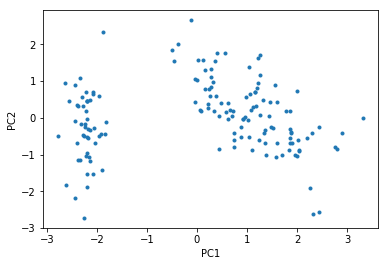

In [29]:
plt.plot(X_proj[:,0], X_proj[:,1], '.')
plt.xlabel('PC1')
plt.ylabel('PC2')

## G.1 Supervised Visualization
Since we have the actual species, let's overlay this data

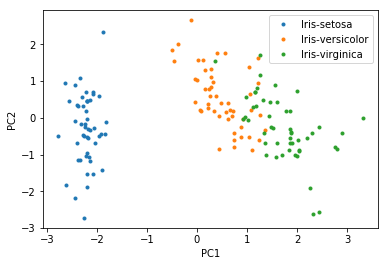

In [30]:
for species in distinct_species:
    plt.plot([X_proj[p, 0] for p in Y[Y.isin([species])].index], [X_proj[p, 1] for p in Y[Y.isin([species])].index], '.', label=species)
    
plt.legend(loc='upper right')
plt.xlabel('PC1')
plt.ylabel('PC2')

# H. Interpretting the Components

In [31]:
one = pd.Series(eigvecs[:, 0], index=X.columns)
one.sort_values(ascending=False)

petal_l_cm    0.581254
petal_w_cm    0.565611
sepal_l_cm    0.522372
sepal_w_cm   -0.263355
dtype: float64

In [32]:
two = pd.Series(eigvecs[:, 1], index=X.columns)
two.sort_values(ascending=False)

petal_l_cm   -0.021095
petal_w_cm   -0.065416
sepal_l_cm   -0.372318
sepal_w_cm   -0.925556
dtype: float64

TODO: based upon the top two basis vectors, what can we generally say about the relative size of Setosa petals/sepals?
The petals length and width are highly corelated for some species.
The sepals length and width are not corelated for species.